machine learning or deep learning algorithms (such as Linear Regression, Logistic Regression, and Artificial Neural Networks) assume that the variable data are normally distributed (i.e. follow a Gaussian distribution)

In [8]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Sample dataset with skewed data
data = {
    'Positively_Skewed': [1, 2, 2, 3, 3, 4, 5, 10, 15, 25],
    'Negatively_Skewed': [25, 20, 18, 15, 12, 10, 8, 7, 6, 5],
    'Symmetric': [4, 5, 5, 6, 6, 6, 7, 7, 8, 9]
}

df = pd.DataFrame(data)

In [9]:
# Display skewness values
print("Skewness:")
print(df.skew())



Skewness:
Positively_Skewed    1.774776
Negatively_Skewed    0.675966
Symmetric            0.359543
dtype: float64



Skewness Value	|       Interpretation           |
    ≈0          |      Symmetric (normal)        |
    >0          |  Right-skewed (positive skew)  |
    <0          |  Left-skewed (negative skew)   |

Absolute Value   |    	Interpretation
< 0.5	         |   Approximately symmetric
0.5 – 1          |   	Moderately skewed
> 1	             |       Highly skewed

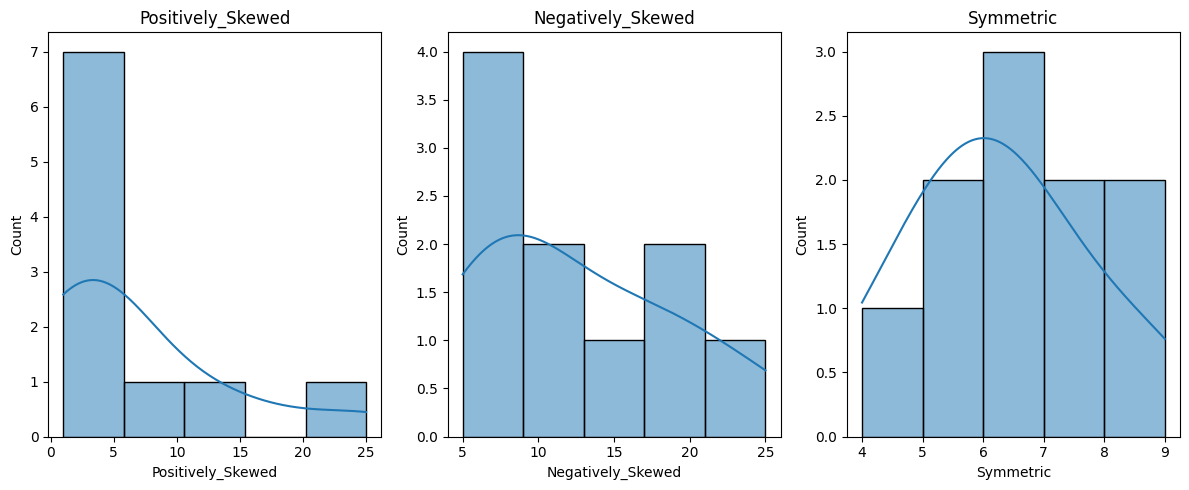

In [16]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### Positive/Right Skewed Data
One can use simple transformations to "normalize" right-skewed data:

log transformations:
np.log(), np.log10 (but this does not deal with zeros in the data)
np.log1p(x) = log(x+1) adds 1, but can only be used for positive data,
square-root transformations: np.sqrt()

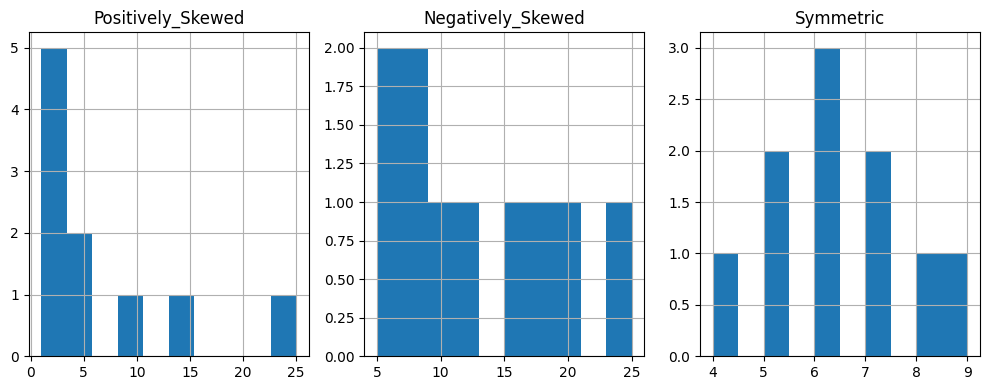

In [17]:
# Optional: Plot histograms
df.hist( figsize=(10, 4), layout=(1, 3))
plt.tight_layout()
plt.show()

### Robust Strategies for Transforming Right-Skewed Data

| Method                    | Formula / Tool                                  | Handles Zeros? | Comment                                                                 |
|---------------------------|--------------------------------------------------|----------------|-------------------------------------------------------------------------|
| Log1p (Natural log + 1)   | `np.log1p(x)` = log(1 + x)                       | Yes            | Safe for zero and small positive values                                 |
| Box-Cox (Scikit-Learn)    | `PowerTransformer(method='box-cox')`            | No (x > 0)     | Only use if all values are strictly positive                            |
| Yeo-Johnson (Scikit-Learn)| `PowerTransformer(method='yeo-johnson')`        | Yes            | Works with zero and negative values; general-purpose                    |
| Custom log(x + ε)         | `np.log(x + 1e-6)`                               | Yes            | Manual control; pick ε based on data scale                              |
| QuantileTransformer       | `QuantileTransformer(output_distribution='normal')` | Yes         | Smooths heavy tails; robust to outliers and zero values                |

*Note: For negatively/left-skewed data, you may reverse values before applying some of these transformations.*


The simplest way of dealing with left skewed data is to transform it to right skewed distribution, and then apply the approaches above.

This can easily be done by simply:

- Flip: Multiplying the data by -1
- Shift: Adding the lowest value (i.e. most negative value) to the data.
- This will transform the negative-skewed distribution to right-skewed, starting from 0.

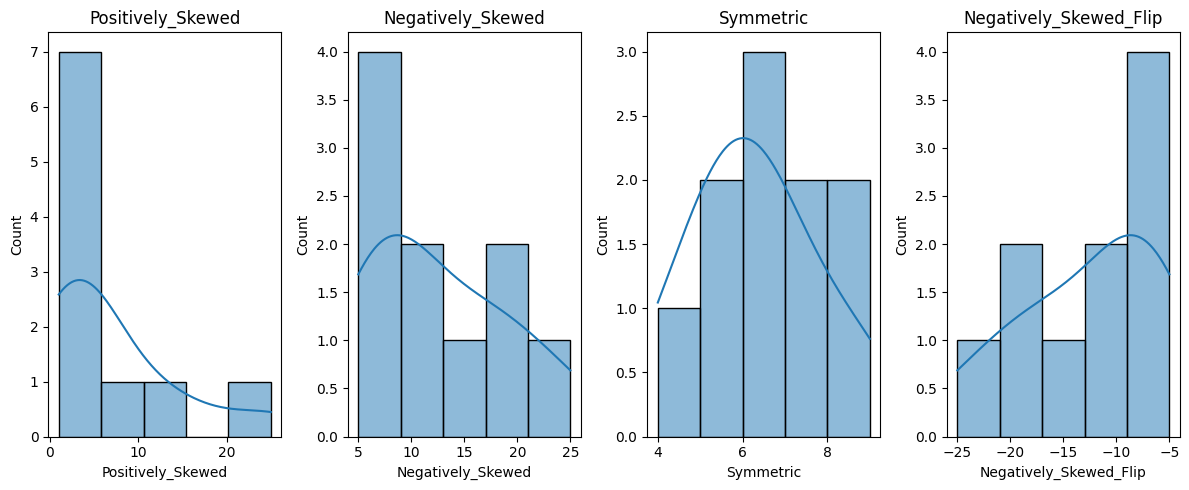

In [27]:
df['Negatively_Skewed_Flip'] =  df['Negatively_Skewed']*-1
plt.figure(figsize=(12, 5))
for i, col in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()